In [1]:
import pickle
import js # github commit 32863a0 https://github.com/jsolvason/js date May 19 2023
import matplotlib.pyplot as plt

In [2]:
# load unfiltered dict
dictname='CEQTL3-50L2-BC3'
fn=f'umm_bc2en2count.{dictname}.pydict.pickle'

with open(fn,'rb') as f:
    bc2en2count=pickle.load(f)

js.dprint(bc2en2count)

TGTTGAAGTCGGTGTCGAGACGGCTCCAGC {'TCTTTGCTATTGTGAATAGTGCTGCAATAAACATACGTGTGCATGTGTCTTTATAGCATGTGTTTTTCTTTGTTCTGATTCTGAATTGCCCTGTTGGTGGTGCTGCCCTGTTAAAAGTCAGTTAGGATGGCCCTGAATGTGAGTTTTGCTAGGCTATTAATGACCGTTTATTTGGCCAACAAGTGTTACAAACACGTGATTAAGCAAAGGTAAGCAAATTCTTTATTACAGGAGTTCTCAGAGCTCTTACTGTACTGACATGAATTATAAATCTTTAAAAGGACGGTATGGTAACTAGACTCCAGCAAAAGGGTCATAGAACCATTTTTAAATTGGTGGTTGTTGTTAGATCTCTTGGCACTAACATTCTTGAAAATATGCTTGGGGAAATGCTAACTCAGAAATTAACGTTTGCTGAACCCAGAGTCCACTGGGTTACCCCTAGGTGAACTTCTAGTTCCCGAAGTTGGCCTTTGGATGAGTCATCTTCCCCCATCAGGTTCAACTATGTGAGGATCATTCTGCAGTCACTCATGATAACCATTTCTCAGTTTAATGGTACAATTCCATATTGCCTTACATTTTATATAAGTTGTAAGCTCATAAAACATCTTTGTATATTTGGAATGTACTAAAGACTGCAAGTTAACCCAGACTAAAACAACCTCAAAGTTATTTGCAATCTTCTGAACATCTCCATATTACAGCAACTGCCCTTCTCACGAGCAGGTCCATTTTCCTTTTTTGATGAGGATACTAGCTTCTGGCAAGCTGAACTCTCCTTTGGATCACAAACTTTCCTTCTCCTAAAGGTCCCAGATGTTACTAAGATTTAAAATAGGTCAGCTCACATTTTTGGCCTTTTCATACAACATAGCCCACGTTAGATTGGTAAAGAGACAGATAACACATAGAAAAAAAGATCCAAGTAGCCCAAGAAAGCCTGTTCCTGGAACGTGATCAAACT

In [3]:
counts=[]
for bc,en2count in bc2en2count.items():
    for en,count in en2count.items():
        counts.append(count)

(0.0, 10.0)

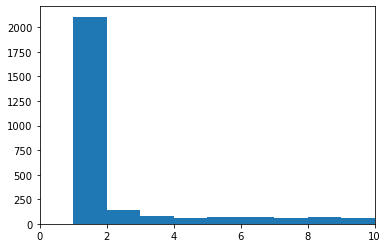

In [4]:
plt.hist(counts,bins=range(100))
plt.xlim(0,10)

# Filter dictionary


In [14]:
# what is minimum barcode readount for unique barcodes to consider TRUE UNIQUE
x=1



In [15]:
len(bc2en2count)

4483

In [16]:
filt_bc2en2count={bc:{en:count for en,count in en2count.items() if int(count)>=x} for bc,en2count in bc2en2count.items()}

In [17]:
len(filt_bc2en2count)

4483

In [18]:
counts=[]
for bc,en2count in filt_bc2en2count.items():
    for en,count in en2count.items():
        counts.append(count)

(0.0, 10.0)

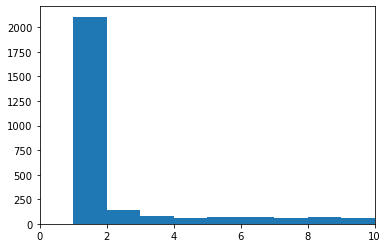

In [19]:
plt.hist(counts,bins=range(100))
plt.xlim(0,10)

In [20]:
filt_ubc2en={}
for bc,en2count in filt_bc2en2count.items():
    
    # skip if not unique match
    if len(en2count)>1: continue
    
    for en in en2count:
        if bc not in filt_ubc2en:
            filt_ubc2en[bc]=en
        else: 
            raise ValueError('1')

In [21]:
len(filt_ubc2en)

4103

In [22]:
with open(f'filt_ubc2en.x={x}.{dictname}.pydict.pickle','wb') as f:
    pickle.dump(filt_ubc2en,f,protocol=pickle.HIGHEST_PROTOCOL)